<a href="https://colab.research.google.com/github/pradhangaurv/Data-Scrapping/blob/master/CourseWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix

#Loading Datasets

In [3]:
df = pd.read_csv("/content/daily_energy_values.csv")

#Checking data

In [4]:
df.head()

,date,nea,nea_subsidiary,ipp,import,total_energy_available,energy_export,inps_demand,energy_interruption,generation_deficit,energy_requirement,net_exchange_with_india
0,2022/09/15,9482,12503,18521,11,40517.0,9316,31201,0,0,31201,0
1,2022/09/26,9302,12852,20023,264,42441.0,8913,33528,0,0,33528,0
2,2022/09/11,10073,12887,19842,788,43589.0,8736,34853,0,0,34853,0
3,2022/09/18,6837,12141,19040,147,38164.0,8295,29870,0,0,29870,0
4,2022/09/17,6682,3948,17978,79,28687.0,5323,23364,260,0,23624,0


#Chaning date to datetime



In [6]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

# Features and Target

In [7]:
X = df[['nea', 'nea_subsidiary', 'ipp', 'import', 'day', 'month']]
y = df['inps_demand']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse  = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Results")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("MSE:", lr_mse)
print("R2:", lr_r2)

Linear Regression Results
MAE: 1789.7182049937458
RMSE: 2281.5491572640053
MSE: 5205466.557012092
R2: 0.8490625177643147


# Random Forest

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_mse  = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Results")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)
print("MSE:", rf_mse)


Random Forest Results
MAE: 861.7004093567252
RMSE: 1156.7983957622052
R2: 0.9611981175170294
MSE: 1338182.5284380114


# XGBoost

In [11]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("\nXGBoost Results")
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print("R2:", xgb_r2)
print("MSE:", xgb_mse)


XGBoost Results
MAE: 787.859619140625
RMSE: 1091.449323147896
R2: 0.9654582142829895
MSE: 1191261.625


# Storing prediction

In [12]:
predictions = {
    "Linear Regression": lr_preds,
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds
}

#Showing result and storing result

In [13]:
results_df = pd.DataFrame({
    "MAE":  [lr_mae, rf_mae, xgb_mae],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R2":   [lr_r2, rf_r2, xgb_r2]
}, index=["Linear Regression", "Random Forest", "XGBoost"])

results_df


,MAE,RMSE,R2
Linear Regression,1789.718205,2281.549157,0.849063
Random Forest,861.700409,1156.798396,0.961198
XGBoost,787.859619,1091.449323,0.965458


#Linear regression

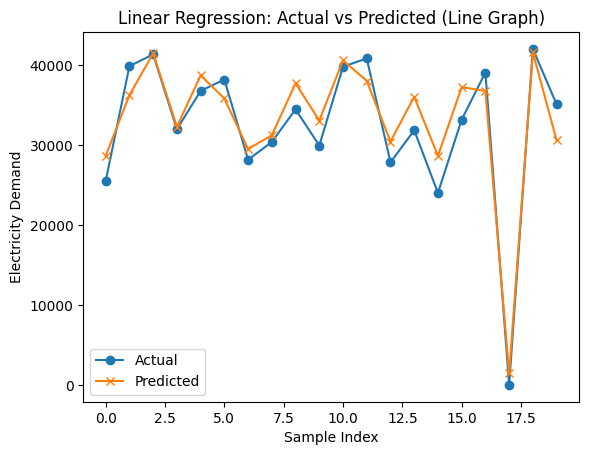

In [14]:
plt.figure()
plt.plot(y_test.values[:20], marker='o', label="Actual")
plt.plot(predictions["Linear Regression"][:20], marker='x', label="Predicted")
plt.title("Linear Regression: Actual vs Predicted (Line Graph)")
plt.xlabel("Sample Index")
plt.ylabel("Electricity Demand")
plt.legend()
plt.show()

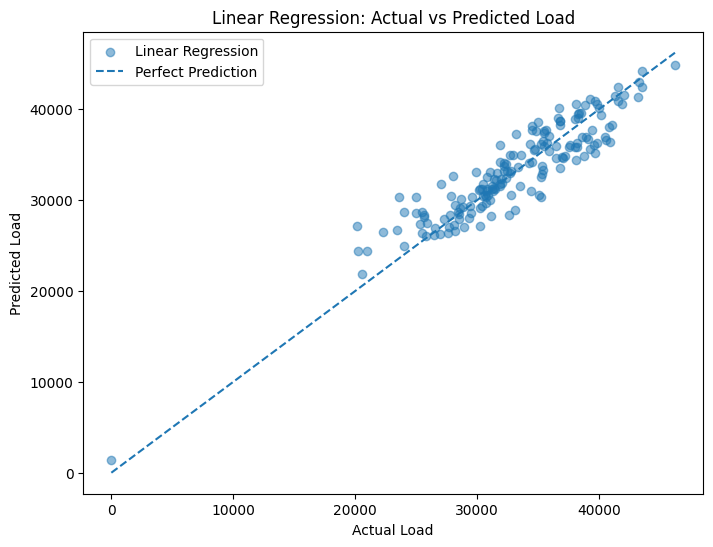

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions['Linear Regression'], alpha=0.5, label="Linear Regression")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    label="Perfect Prediction"
)
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Linear Regression: Actual vs Predicted Load')
plt.legend()
plt.show()


#Random Forest

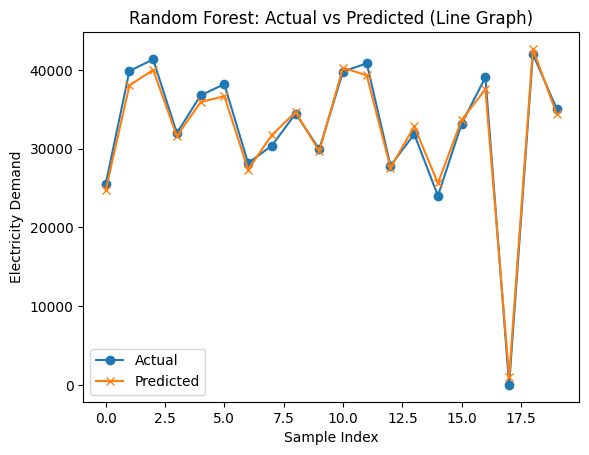

In [16]:
plt.figure()
plt.plot(y_test.values[:20], marker='o', label="Actual")
plt.plot(predictions["Random Forest"][:20], marker='x', label="Predicted")
plt.title("Random Forest: Actual vs Predicted (Line Graph)")
plt.xlabel("Sample Index")
plt.ylabel("Electricity Demand")
plt.legend()
plt.show()


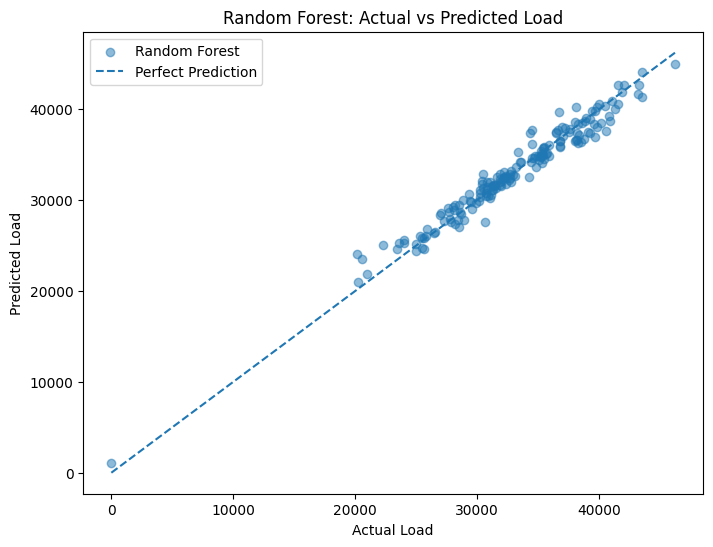

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions['Random Forest'], alpha=0.5, label="Random Forest")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    label="Perfect Prediction"
)
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Random Forest: Actual vs Predicted Load')
plt.legend()
plt.show()


# XGBoost

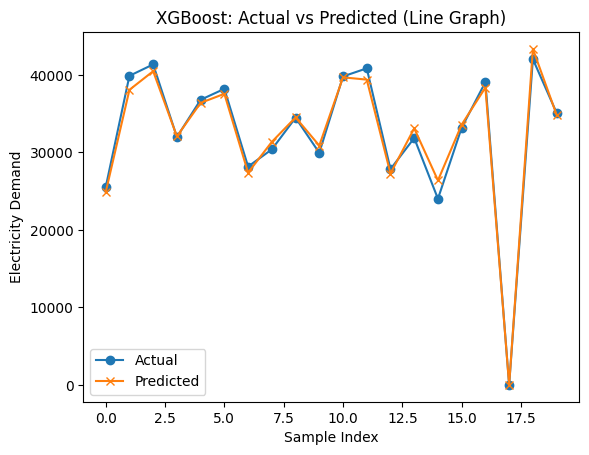

In [18]:
plt.figure()
plt.plot(y_test.values[:20], marker='o', label="Actual")
plt.plot(predictions["XGBoost"][:20], marker='x', label="Predicted")
plt.title("XGBoost: Actual vs Predicted (Line Graph)")
plt.xlabel("Sample Index")
plt.ylabel("Electricity Demand")
plt.legend()
plt.show()

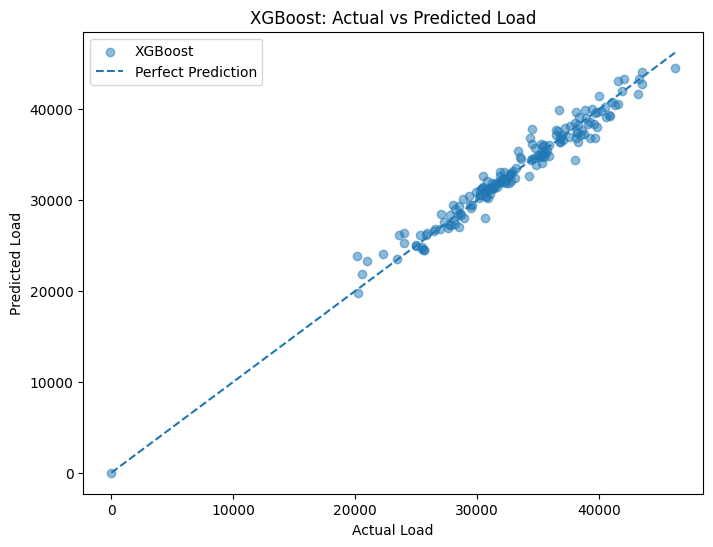

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions['XGBoost'], alpha=0.5, label="XGBoost")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    label="Perfect Prediction"
)
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('XGBoost: Actual vs Predicted Load')
plt.legend()
plt.show()

#Model Comparision

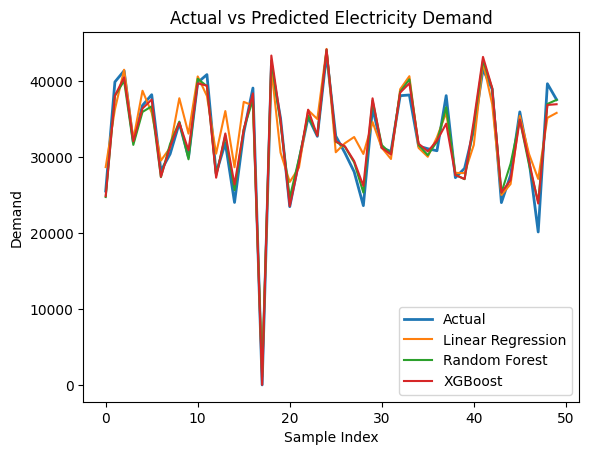

,MAE,RMSE,R2
Linear Regression,1789.718205,2281.549157,0.849063
Random Forest,861.700409,1156.798396,0.961198
XGBoost,787.859619,1091.449323,0.965458


In [20]:

plt.figure()
plt.plot(y_test.values[:50], label="Actual", linewidth=2)
plt.plot(predictions["Linear Regression"][:50], label="Linear Regression")
plt.plot(predictions["Random Forest"][:50], label="Random Forest")
plt.plot(predictions["XGBoost"][:50], label="XGBoost")
plt.title("Actual vs Predicted Electricity Demand")
plt.xlabel("Sample Index")
plt.ylabel("Demand")
plt.legend()
plt.show()
results_df

# Bar plot

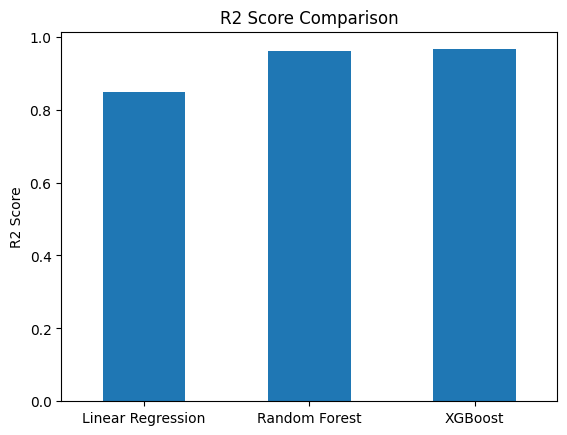

In [21]:
results_df['R2'].plot(kind='bar')
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.xticks(rotation=0)
plt.show()

# Bar plot for error prediction

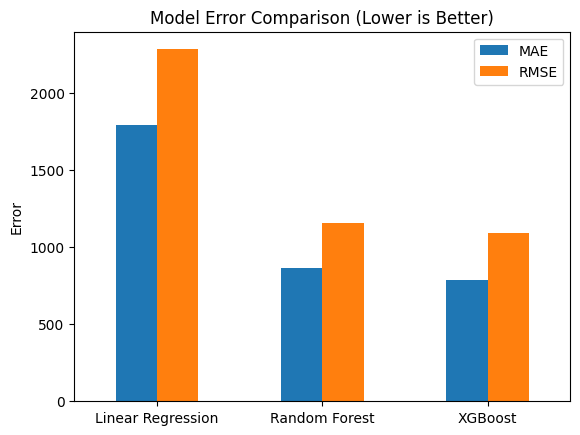

In [22]:
results_df[['MAE', 'RMSE']].plot(kind='bar')
plt.title("Model Error Comparison (Lower is Better)")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.show()

# Scatter PLot

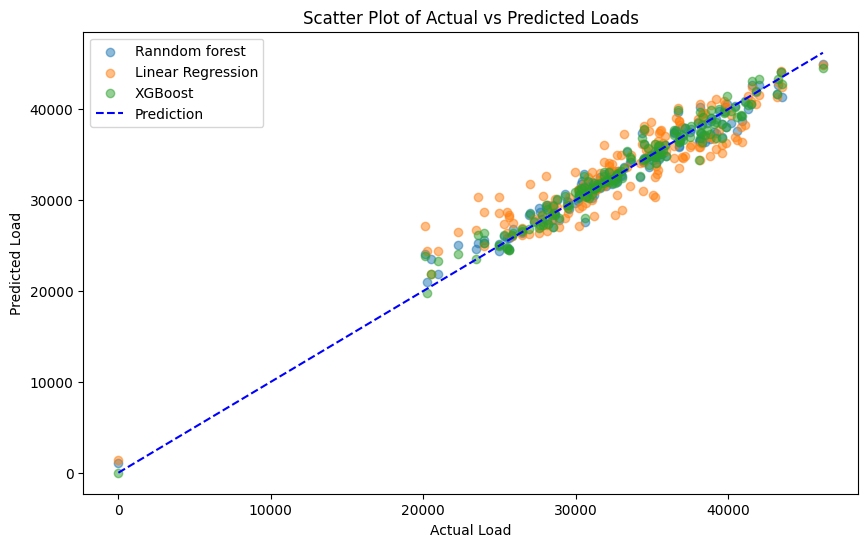

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions['Random Forest'], alpha=0.5,label="Ranndom forest")
plt.scatter(y_test, predictions['Linear Regression'], alpha=0.5, label = "Linear Regression")
plt.scatter(y_test, predictions['XGBoost'],label = "XGBoost", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],linestyle='--',color='blue',label="Prediction" )
plt.xlabel('Actual Load')
plt.ylabel('Predicted Load')
plt.title('Scatter Plot of Actual vs Predicted Loads')
plt.legend()
plt.show()

# Heat map

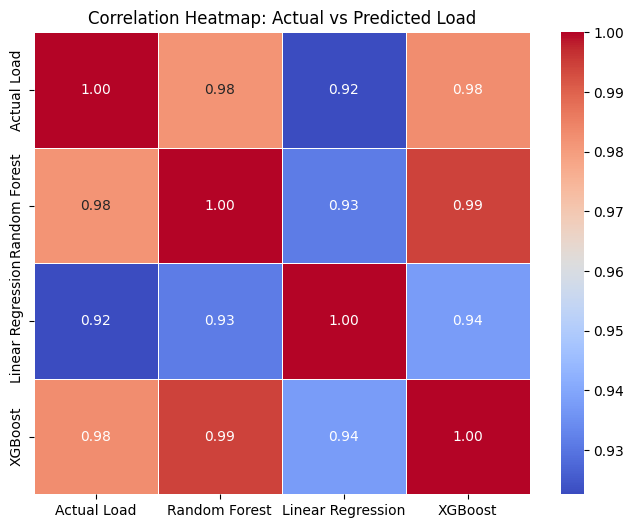

In [24]:
heatmap_df = pd.DataFrame({
    'Actual Load': y_test.values,
    'Random Forest': rf_preds,
    'Linear Regression': lr_preds,
    'XGBoost': xgb_preds
})

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap: Actual vs Predicted Load")
plt.show()

# Define bins and labels

In [25]:
bins = [
    y.min(),
    y.quantile(0.33),
    y.quantile(0.66),
    y.max()
]

labels = [0, 1, 2]

In [26]:
y_test_binned = pd.cut(
    y_test,
    bins=bins,
    labels=labels,
    include_lowest=True
)

y_pred_binned = pd.cut(
    predictions["XGBoost"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
valid_idx = (~y_test_binned.isna()) & (~y_pred_binned.isna())

y_test_binned = y_test_binned[valid_idx]
y_pred_binned = y_pred_binned[valid_idx]

# Confusion Matrix

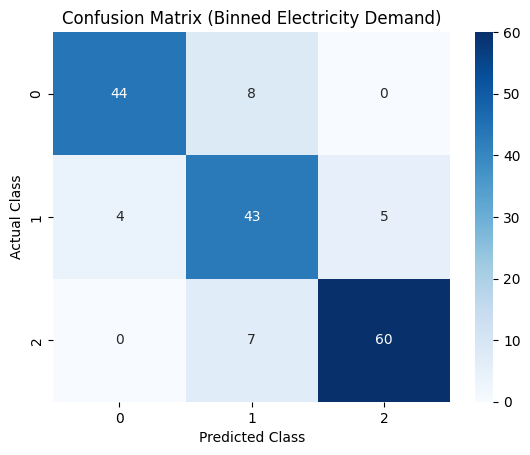

In [27]:
cm = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Binned Electricity Demand)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

#Accuracy Curve on Latest Data

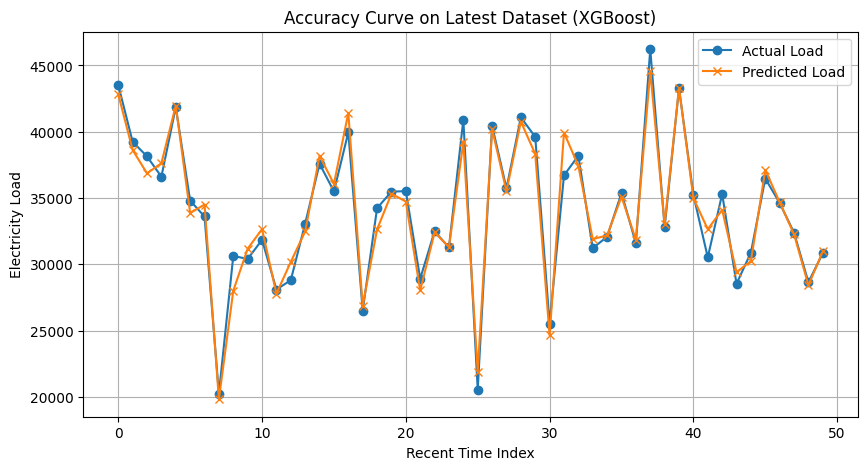

In [28]:
n_last = 50
actual_last = y_test.values[-n_last:]
predicted_last = xgb_preds[-n_last:]

plt.figure(figsize=(10,5))
plt.plot(actual_last, marker='o', label="Actual Load")
plt.plot(predicted_last, marker='x', label="Predicted Load")
plt.xlabel("Recent Time Index")
plt.ylabel("Electricity Load")
plt.title("Accuracy Curve on Latest Dataset (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()
